In [8]:
import pandas as pd

# URL of the CSV file
csv_url = '/Users/amydoerr/Downloads/Correct_full_df_CA.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_url)

# Display the first few rows of the DataFrame
print(df.head())

      MID  Lib_Con  F1.1  F1.2  F1.3  G1.1  G1.2  G1.3  G1.4  H1.1  H1.2  \
0  CON001      1.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1  CON003      1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2  CON004      1.0   1.0   1.0   0.0   0.0   1.0   1.0   1.0   0.0   0.0   
3  CON005      1.0   0.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
4  CON006      1.0   0.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   

   Mean_textualtone  Mean_visualtone  
0              -1.0             -1.0  
1               1.0              1.0  
2              -1.0             -1.0  
3               1.0             -1.0  
4               0.0             -1.0  


In [9]:
# Dictionary mapping old column names to new ones
rename_dict = {
    'F1.1': 'ElectionTheme',
    'F1.2': 'Internalaffairs',
    'F1.3': 'Externalaffairs',
    'G1.1': 'VisStereotype',
    'G1.2': 'TextStereotype',
    'G1.3': 'VisInsult',
    'G1.4': 'TextInsult',
    'H1.1': 'VisGlory',
    'H1.2': 'TextGlory',
}

# Rename the columns
df.rename(columns=rename_dict, inplace=True)

# Verify the changes
print(df.head())


      MID  Lib_Con  ElectionTheme  Internalaffairs  Externalaffairs  \
0  CON001      1.0            1.0              1.0              0.0   
1  CON003      1.0            0.0              1.0              0.0   
2  CON004      1.0            1.0              1.0              0.0   
3  CON005      1.0            0.0              1.0              0.0   
4  CON006      1.0            0.0              1.0              0.0   

   VisStereotype  TextStereotype  VisInsult  TextInsult  VisGlory  TextGlory  \
0            0.0             0.0        0.0         0.0       0.0        0.0   
1            0.0             0.0        0.0         0.0       0.0        0.0   
2            0.0             1.0        1.0         1.0       0.0        0.0   
3            0.0             0.0        0.0         1.0       0.0        0.0   
4            0.0             0.0        0.0         1.0       0.0        0.0   

   Mean_textualtone  Mean_visualtone  
0              -1.0             -1.0  
1             

In [10]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


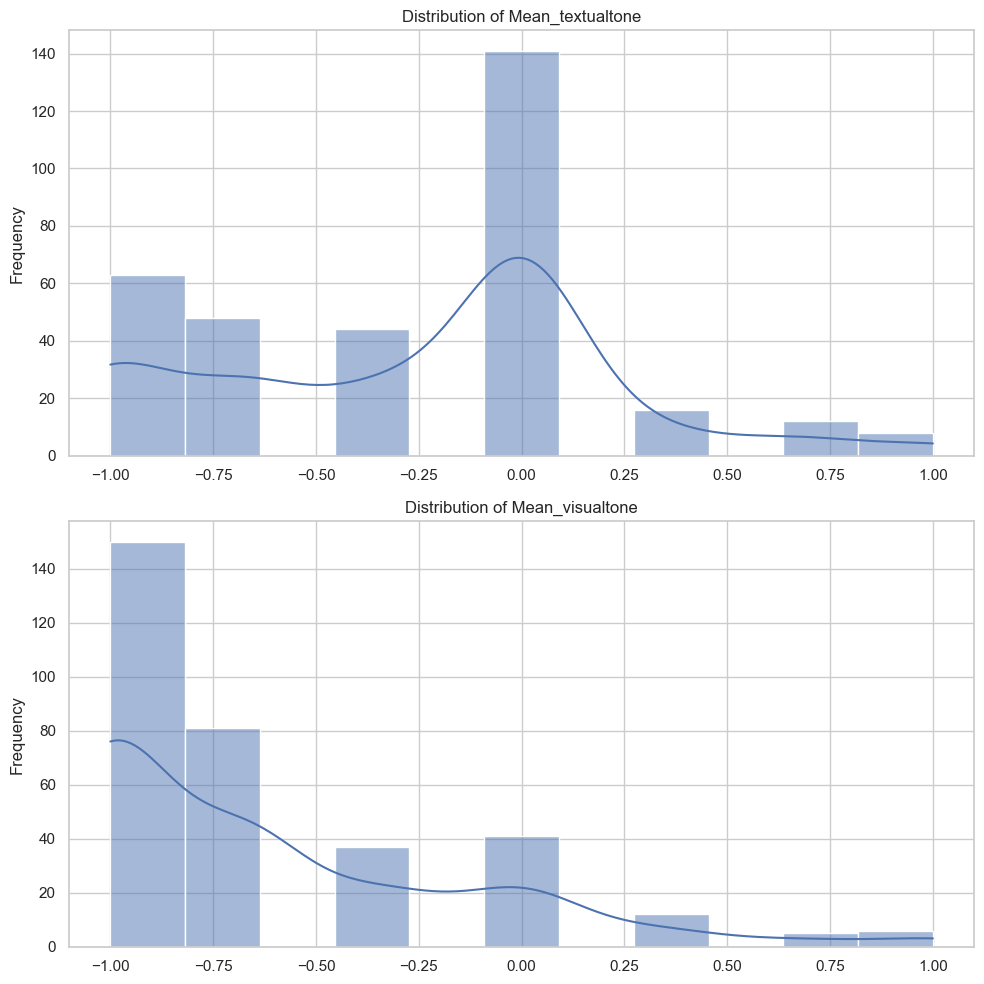

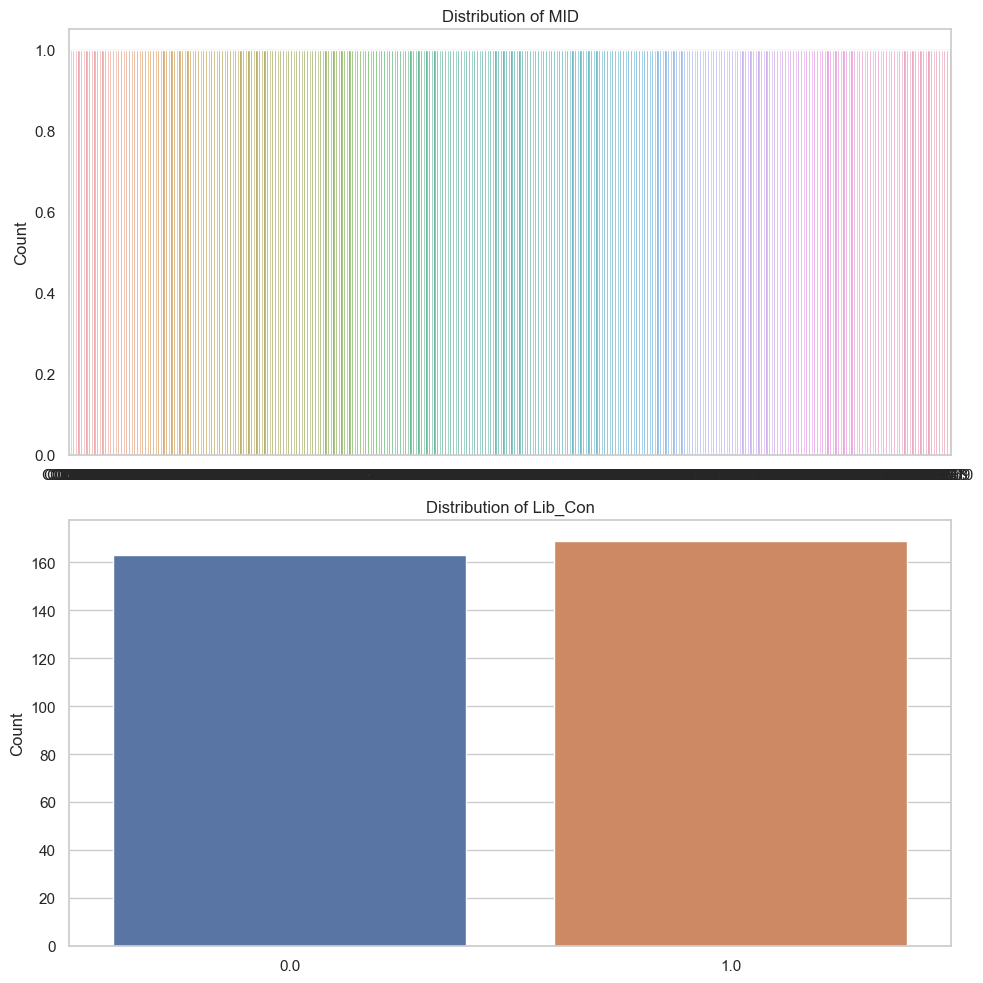

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
# Replace 'df' with the actual name of your DataFrame

# Set the style of seaborn for nicer plots
sns.set(style="whitegrid")

# Plotting distributions for numerical variables 
numerical_vars = [ 'Mean_textualtone',  'Mean_visualtone']

fig, axes = plt.subplots(len(numerical_vars), 1, figsize=(10, 5 * len(numerical_vars)))

for i, var in enumerate(numerical_vars):
    sns.histplot(data=df, x=var, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plotting distributions for categorical variables
categorical_vars = ['MID', 'Lib_Con']

fig, axes = plt.subplots(len(categorical_vars), 1, figsize=(10, 5 * len(categorical_vars)))

for i, var in enumerate(categorical_vars):
    sns.countplot(data=df, x=var, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


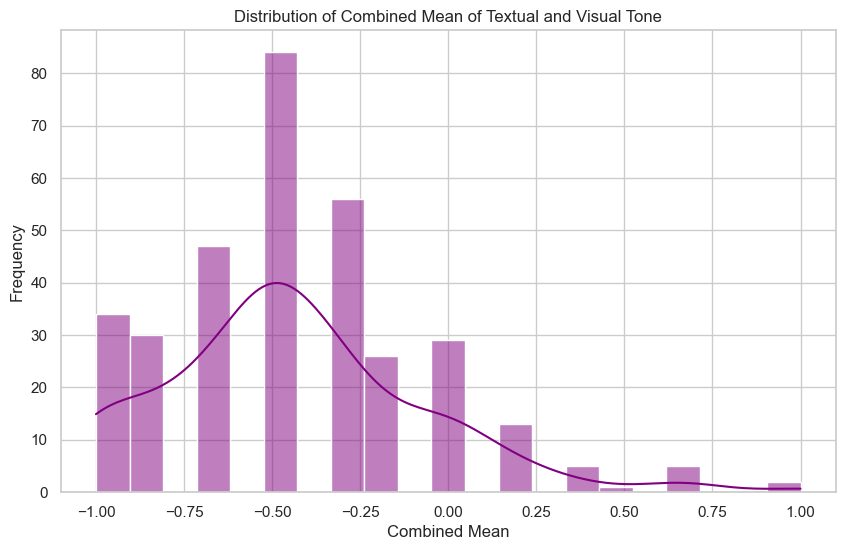

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Calculate the combined mean of 'Mean_I1.1' and 'Mean_I1.2'
df['Combined_Mean_Tone'] = df[['Mean_textualtone',  'Mean_visualtone']].mean(axis=1)

# Now, plot the distribution of the combined mean
plt.figure(figsize=(10, 6))
sns.histplot(df['Combined_Mean_Tone'], kde=True, color='purple')
plt.title('Distribution of Combined Mean of Textual and Visual Tone')
plt.xlabel('Combined Mean')
plt.ylabel('Frequency')
plt.show()

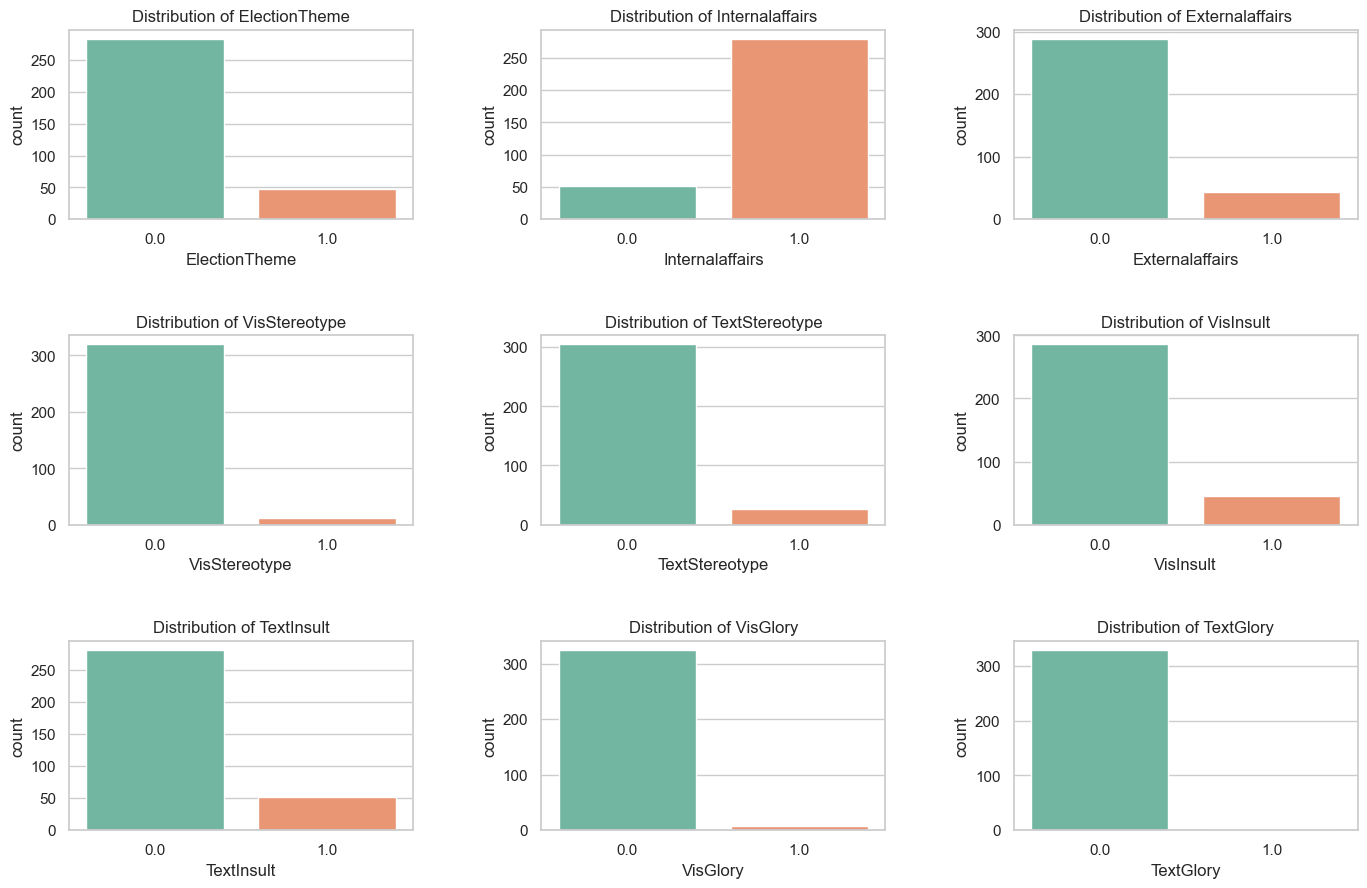

In [13]:
import matplotlib.pyplot as plt
import seaborn as ss
import pandas as pd

# Assuming 'df' is your DataFrame
variables = ['ElectionTheme','Internalaffairs','Externalaffairs', 'VisStereotype','TextStereotype','VisInsult','TextInsult', 'VisGlory','TextGlory']

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.tight_layout(pad=5.0)

# Iterate over the variables and create a count plot for each one
for var, ax in zip(variables, axes.flatten()):
    sns.countplot(x=var, data=df, palette='Set2', ax=ax)
    ax.set_title(f'Distribution of {var}')

plt.show()


In [14]:
# Assuming 'df' is your DataFrame and 'Lib_Con' is the column of interest
lib_con_distribution = df['Lib_Con'].value_counts()

# For a more detailed table, including percentages, you can normalize the counts
lib_con_distribution_normalized = df['Lib_Con'].value_counts(normalize=True) * 100

# Combine both counts and percentages into a single DataFrame for better readability
distribution_table = pd.DataFrame({
    'Counts': lib_con_distribution,
    'Percentage (%)': lib_con_distribution_normalized
})

# Display the distribution table
print(distribution_table)


         Counts  Percentage (%)
Lib_Con                        
1.0         169       50.903614
0.0         163       49.096386
